#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [74]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [75]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [76]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [77]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [78]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [79]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [80]:
model = Sequential()

In [81]:
#卷積層1

In [82]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [83]:
model.add(Dropout(rate=0.25))

In [84]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [85]:
#卷積層2與池化層2

In [86]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [87]:
model.add(Dropout(0.25))

In [88]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [89]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [90]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [91]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [92]:
model.add(Dense(10, activation='softmax'))

In [93]:
# #卷積層3與池化層3
# model.add(Conv2D(filters=128, kernel_size=(3, 3), 
#                  activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

In [94]:
# #卷積層4與池化層4
# model.add(Conv2D(filters=256, kernel_size=(3, 3), 
#                  activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

In [95]:
# #建立神經網路(平坦層、隱藏層、輸出層)
# model.add(Flatten())

In [96]:
# #建立全網路連接層
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))

In [97]:
#建立輸出層
model.add(Dense(10, activation='softmax'))

In [98]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [99]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [100]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)        

Epoch 1/12
293/293 [==============================] - 39s 134ms/step - loss: 0.0901 - accuracy: 0.0980 - val_loss: 0.0901 - val_accuracy: 0.1025
Epoch 2/12
293/293 [==============================] - 37s 128ms/step - loss: 0.0901 - accuracy: 0.0969 - val_loss: 0.0901 - val_accuracy: 0.1025
Epoch 3/12
293/293 [==============================] - 38s 131ms/step - loss: 0.0901 - accuracy: 0.1006 - val_loss: 0.0901 - val_accuracy: 0.1025
Epoch 4/12
293/293 [==============================] - 38s 129ms/step - loss: 0.0901 - accuracy: 0.0982 - val_loss: 0.0901 - val_accuracy: 0.1025
Epoch 5/12
293/293 [==============================] - 38s 129ms/step - loss: 0.0901 - accuracy: 0.1015 - val_loss: 0.0901 - val_accuracy: 0.1025
Epoch 6/12
293/293 [==============================] - 38s 129ms/step - loss: 0.0901 - accuracy: 0.1023 - val_loss: 0.0901 - val_accuracy: 0.1025
Epoch 7/12
293/293 [==============================] - 38s 129ms/step - loss: 0.0901 - accuracy: 0.1001 - val_loss: 0.0901 - val_ac

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

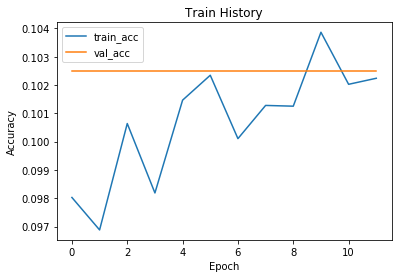

In [102]:
show_train_history('accuracy','val_accuracy')

In [103]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)        

Epoch 1/12
293/293 [==============================] - 40s 138ms/step - loss: 0.3253 - accuracy: 0.1017 - val_loss: 0.3253 - val_accuracy: 0.1025
Epoch 2/12
293/293 [==============================] - 39s 134ms/step - loss: 0.3252 - accuracy: 0.1036 - val_loss: 0.3252 - val_accuracy: 0.1025
Epoch 3/12
293/293 [==============================] - 39s 133ms/step - loss: 0.3250 - accuracy: 0.1025 - val_loss: 0.3251 - val_accuracy: 0.1025
Epoch 4/12
293/293 [==============================] - 69s 237ms/step - loss: 0.3249 - accuracy: 0.1017 - val_loss: 0.3249 - val_accuracy: 0.1025
Epoch 5/12
293/293 [==============================] - 73s 248ms/step - loss: 0.3247 - accuracy: 0.1023 - val_loss: 0.3248 - val_accuracy: 0.1026
Epoch 6/12
293/293 [==============================] - 73s 248ms/step - loss: 0.3246 - accuracy: 0.1030 - val_loss: 0.3247 - val_accuracy: 0.1025
Epoch 7/12
293/293 [==============================] - 71s 242ms/step - loss: 0.3244 - accuracy: 0.1049 - val_loss: 0.3246 - val_ac

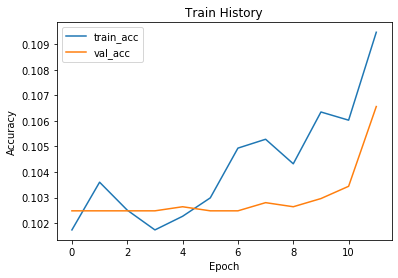

In [104]:
show_train_history('accuracy','val_accuracy')